In [1]:
import data as d

In [2]:
data_list = d.get_data(5000, 16, 25, 10)

2818.06952
2133.43968


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import model_gru as m
import tree_net_sequential as TN
import imp

imp.reload(TN)

<module 'tree_net_sequential' from 'C:\\Users\\Hendrik\\Documents\\GitHub\\ModelTreeGRU\\tree_net_sequential.py'>

In [27]:
tree_n = TN.TreeNet([50, 250, 500], 10, [50, 10, 10], 0.001)

In [28]:
tree_n.get_data_for_level(torch.from_numpy(data_list[0]).float().cuda(), 1).shape

torch.Size([100, 16, 50])

### Training level 0

In [29]:
td0 = {}

loss_f = nn.MSELoss()

In [37]:
for e in range(500):
    avg_loss = 0.0
    
    for i, b in enumerate(data_list):
        if i not in td0:
            data = tree_n.get_data_for_level(torch.from_numpy(b).float().cuda(), 0)
            td0[i] = data
        else:
            data = td0[i]
        
        b_loss = 0.0
        
        for m in range(data.shape[0] // tree_n.time_steps_level[0]):
            
            s = data[m*tree_n.time_steps_level[0] : (m+1) * tree_n.time_steps_level[0]]
            
            tree_n.zero_grad()

            state = tree_n.forward(s, 0)
            pred = tree_n.backward(state, 0)

            loss = loss_f(pred, s)
            loss.backward()
            
            b_loss += loss

            tree_n.optimizers[0].step()
        
        b_loss /= tree_n.time_steps_level[0]
        
        print("Batch loss", b_loss)
        
        avg_loss += b_loss
            
    avg_loss /= len(data_list)
    
    print(e, avg_loss)

Batch loss tensor(0.0694, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0900, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0779, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0866, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0760, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0644, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0668, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0733, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0784, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0671, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0579, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0547, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0532, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0620, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.0633, device='cuda:0', grad_fn=<DivBackwar

KeyboardInterrupt: 

In [38]:
torch.save(tree_n.encoders[0], "models/seq_tn/encoder-02-11-2020-L0.mdl")
torch.save(tree_n.decoders[0], "models/seq_tn/decoder-02-11-2020-L0.mdl")

### Training Level 1

In [44]:
td1 = {}

loss_f1 = nn.MSELoss()

In [45]:
for e in range(500):
    avg_loss = 0.0
    
    for i, b in enumerate(data_list):
        if i not in td1:
            data = tree_n.get_data_for_level(torch.from_numpy(b).float().cuda(), 1).detach()
            td1[i] = data
        else:
            data = td1[i]
        
        b_loss = 0.0
        
        for m in range(data.shape[0] // tree_n.time_steps_level[1]):
            
            s = data[m*tree_n.time_steps_level[1] : (m+1) * tree_n.time_steps_level[1]]
            
            tree_n.zero_grad()

            state = tree_n.forward(s, 1)
            pred = tree_n.backward(state, 1)

            loss = loss_f1(pred, s)
            loss.backward()
            
            b_loss += loss

            tree_n.optimizers[1].step()
        
        b_loss /= tree_n.time_steps_level[1]
        
        print("Batch loss", b_loss)
        
        avg_loss += b_loss
            
    avg_loss /= len(data_list)
    
    print(e, avg_loss)

Batch loss tensor(0.2062, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.2233, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1856, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1907, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1760, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1735, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1576, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1691, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1730, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1610, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1455, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1273, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1437, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1507, device='cuda:0', grad_fn=<DivBackward0>)
Batch loss tensor(0.1464, device='cuda:0', grad_fn=<DivBackwar

In [46]:
torch.save(tree_n.encoders[1], "models/seq_tn/encoder-02-11-2020-L1.mdl")
torch.save(tree_n.decoders[1], "models/seq_tn/decoder-02-11-2020-L1.mdl")

### Training Level 2

In [47]:
td2 = {}

loss_f2 = nn.MSELoss()

In [48]:
for e in range(500):
    avg_loss = 0.0
    
    for i, b in enumerate(data_list):
        if i not in td2:
            data = tree_n.get_data_for_level(torch.from_numpy(b).float().cuda(), 2).detach()
            td2[i] = data
        else:
            data = td2[i]
        
        b_loss = 0.0
        
        for m in range(data.shape[0] // tree_n.time_steps_level[2]):
            
            s = data[m*tree_n.time_steps_level[2] : (m+1) * tree_n.time_steps_level[2]]
            
            tree_n.zero_grad()

            state = tree_n.forward(s, 2)
            pred = tree_n.backward(state, 2)

            loss = loss_f1(pred, s)
            loss.backward()
            
            b_loss += loss

            tree_n.optimizers[2].step()
        
        b_loss /= tree_n.time_steps_level[2]
                
        avg_loss += b_loss
            
    avg_loss /= len(data_list)
    
    print(e, avg_loss)

0 tensor(0.0319, device='cuda:0', grad_fn=<DivBackward0>)
1 tensor(0.0272, device='cuda:0', grad_fn=<DivBackward0>)
2 tensor(0.0264, device='cuda:0', grad_fn=<DivBackward0>)
3 tensor(0.0260, device='cuda:0', grad_fn=<DivBackward0>)
4 tensor(0.0255, device='cuda:0', grad_fn=<DivBackward0>)
5 tensor(0.0252, device='cuda:0', grad_fn=<DivBackward0>)
6 tensor(0.0251, device='cuda:0', grad_fn=<DivBackward0>)
7 tensor(0.0244, device='cuda:0', grad_fn=<DivBackward0>)
8 tensor(0.0240, device='cuda:0', grad_fn=<DivBackward0>)
9 tensor(0.0239, device='cuda:0', grad_fn=<DivBackward0>)
10 tensor(0.0236, device='cuda:0', grad_fn=<DivBackward0>)
11 tensor(0.0235, device='cuda:0', grad_fn=<DivBackward0>)
12 tensor(0.0232, device='cuda:0', grad_fn=<DivBackward0>)
13 tensor(0.0227, device='cuda:0', grad_fn=<DivBackward0>)
14 tensor(0.0226, device='cuda:0', grad_fn=<DivBackward0>)
15 tensor(0.0224, device='cuda:0', grad_fn=<DivBackward0>)
16 tensor(0.0223, device='cuda:0', grad_fn=<DivBackward0>)
17 tens

In [49]:
torch.save(tree_n.encoders[2], "models/seq_tn/encoder-02-11-2020-L2.mdl")
torch.save(tree_n.decoders[2], "models/seq_tn/decoder-02-11-2020-L2.mdl")

In [50]:
def apply(data):
    l1_f = []
    for i in range(5000 // 50):
        l1_h = tree_n.forward(data[i*50 : (i+1)*50], 0)
        l1_f.append(l1_h)
        
    l1 = torch.cat(l1_f, dim=0)
    
    l2_f = []
    for i in range(100 // 10):
        l2_h = tree_n.forward(l1[i*10 : (i+1)*10], 1)
        l2_f.append(l2_h)
        
    l2 = torch.cat(l2_f, dim=0)
    
    feature_vec = tree_n.forward(l2, 2)
    
    l2_dec = tree_n.backward(feature_vec, 2)
    
    l1_dec_f = []
    
    for i in range(10):
        l1_dec_h = tree_n.backward(l2_dec[i:i+1], 1)
        l1_dec_f.append(l1_dec_h)
        
    l1_dec = torch.cat(l1_dec_f, dim=0)
    
    l0_dec_f = []
    
    for i in range(100):
        l0_dec_h = tree_n.backward(l1_dec[i:i+1], 0)
        l0_dec_f.append(l0_dec_h)
        
    l0 = torch.cat(l0_dec_f)
    
    return l0
        
        
        

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

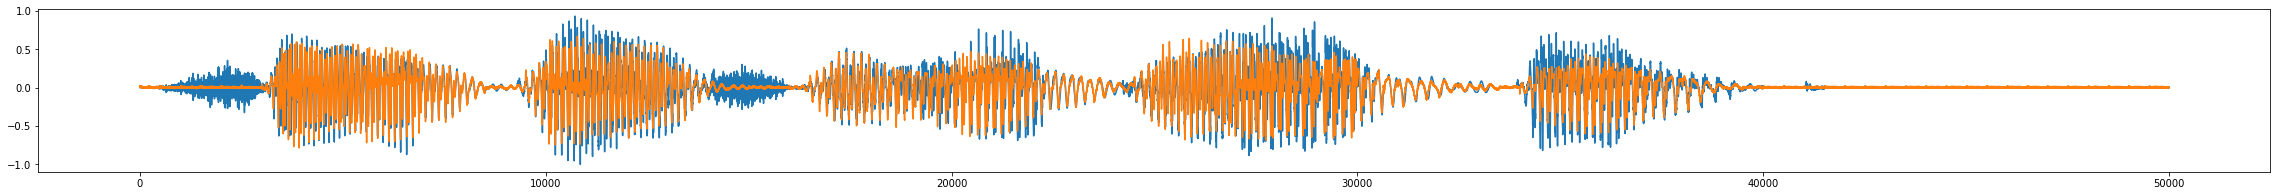

In [70]:
idx = 9

in_data = data_list[0]
out_data = apply(torch.from_numpy(in_data).float().cuda())

plt.rcParams["figure.figsize"] = (40,3)
plt.plot(in_data[:,idx,:].reshape((-1,)))
plt.plot(out_data[:,idx,:].cpu().detach().numpy().reshape((-1,)))

In [71]:
idx = 9
np_data_out = out_data[:,idx,:].cpu().detach().numpy().reshape((-1,))
np_data_in = in_data[:,idx,:].reshape((-1,))
scaled_out = np.int16(np_data_out/np.max(np.abs(np_data_out)) * 32767)
scaled_in = np.int16(np_data_in/np.max(np.abs(np_data_in)) * 32767)

write('test_in.wav', 24000, scaled_in)
write('test_out.wav', 24000, scaled_out)